# <center>Personal loan prediction</center>
### **<center> A machine learning problem using logistic regression, decision tree, support vector machine and K nearest neighbor  </center>**

### **<center>Mijail Dragowski</center>**
### **<center>2023</center>**

#### Import the necesary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


#### Load the dataframe

In [3]:
DF = pd.read_csv("Bank_data.csv")

#### View of the first 5 rows of the dataframe to confirm that the dataframe is loaded correctly


In [4]:
DF.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Count  dataframe  rows and columns 


In [5]:
DF.shape

(5000, 14)

#### Check and count dataset missing values 


In [6]:
for column in  DF.isnull().columns.values.tolist():
    print(column)
    print ( DF.isnull()[column].value_counts())
    print("")   

ID
False    5000
Name: ID, dtype: int64

Age
False    5000
Name: Age, dtype: int64

Experience
False    5000
Name: Experience, dtype: int64

Income
False    5000
Name: Income, dtype: int64

ZIP Code
False    5000
Name: ZIP Code, dtype: int64

Family
False    5000
Name: Family, dtype: int64

CCAvg
False    5000
Name: CCAvg, dtype: int64

Education
False    5000
Name: Education, dtype: int64

Mortgage
False    5000
Name: Mortgage, dtype: int64

Personal Loan
False    5000
Name: Personal Loan, dtype: int64

Securities Account
False    5000
Name: Securities Account, dtype: int64

CD Account
False    5000
Name: CD Account, dtype: int64

Online
False    5000
Name: Online, dtype: int64

CreditCard
False    5000
Name: CreditCard, dtype: int64



#### Check for duplicate rows


In [7]:
DF.duplicated().sum()

0

#### We study the statistical significance of the variables with respect to our variable of interest (personal loan)


In [8]:
X = DF.drop("Personal Loan", axis=1)
y = DF["Personal Loan"]

logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.129635
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4987
Method:                           MLE   Df Model:                           12
Date:                Mon, 06 Feb 2023   Pseudo R-squ.:                  0.5900
Time:                        17:18:40   Log-Likelihood:                -648.18
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
ID                 -5.534e-05   5.12e-05     -1.081      0.280      -0.000     4.5e-05
Age  

#### We delete the daframe column that we are not going to need because there not statistically significant


In [9]:
df=DF.drop(columns=["ID","Mortgage"])

In [10]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1


#### We see the dataframe descriptive statistics


In [11]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### We plot histograms of the variables to visualize their respective distributions


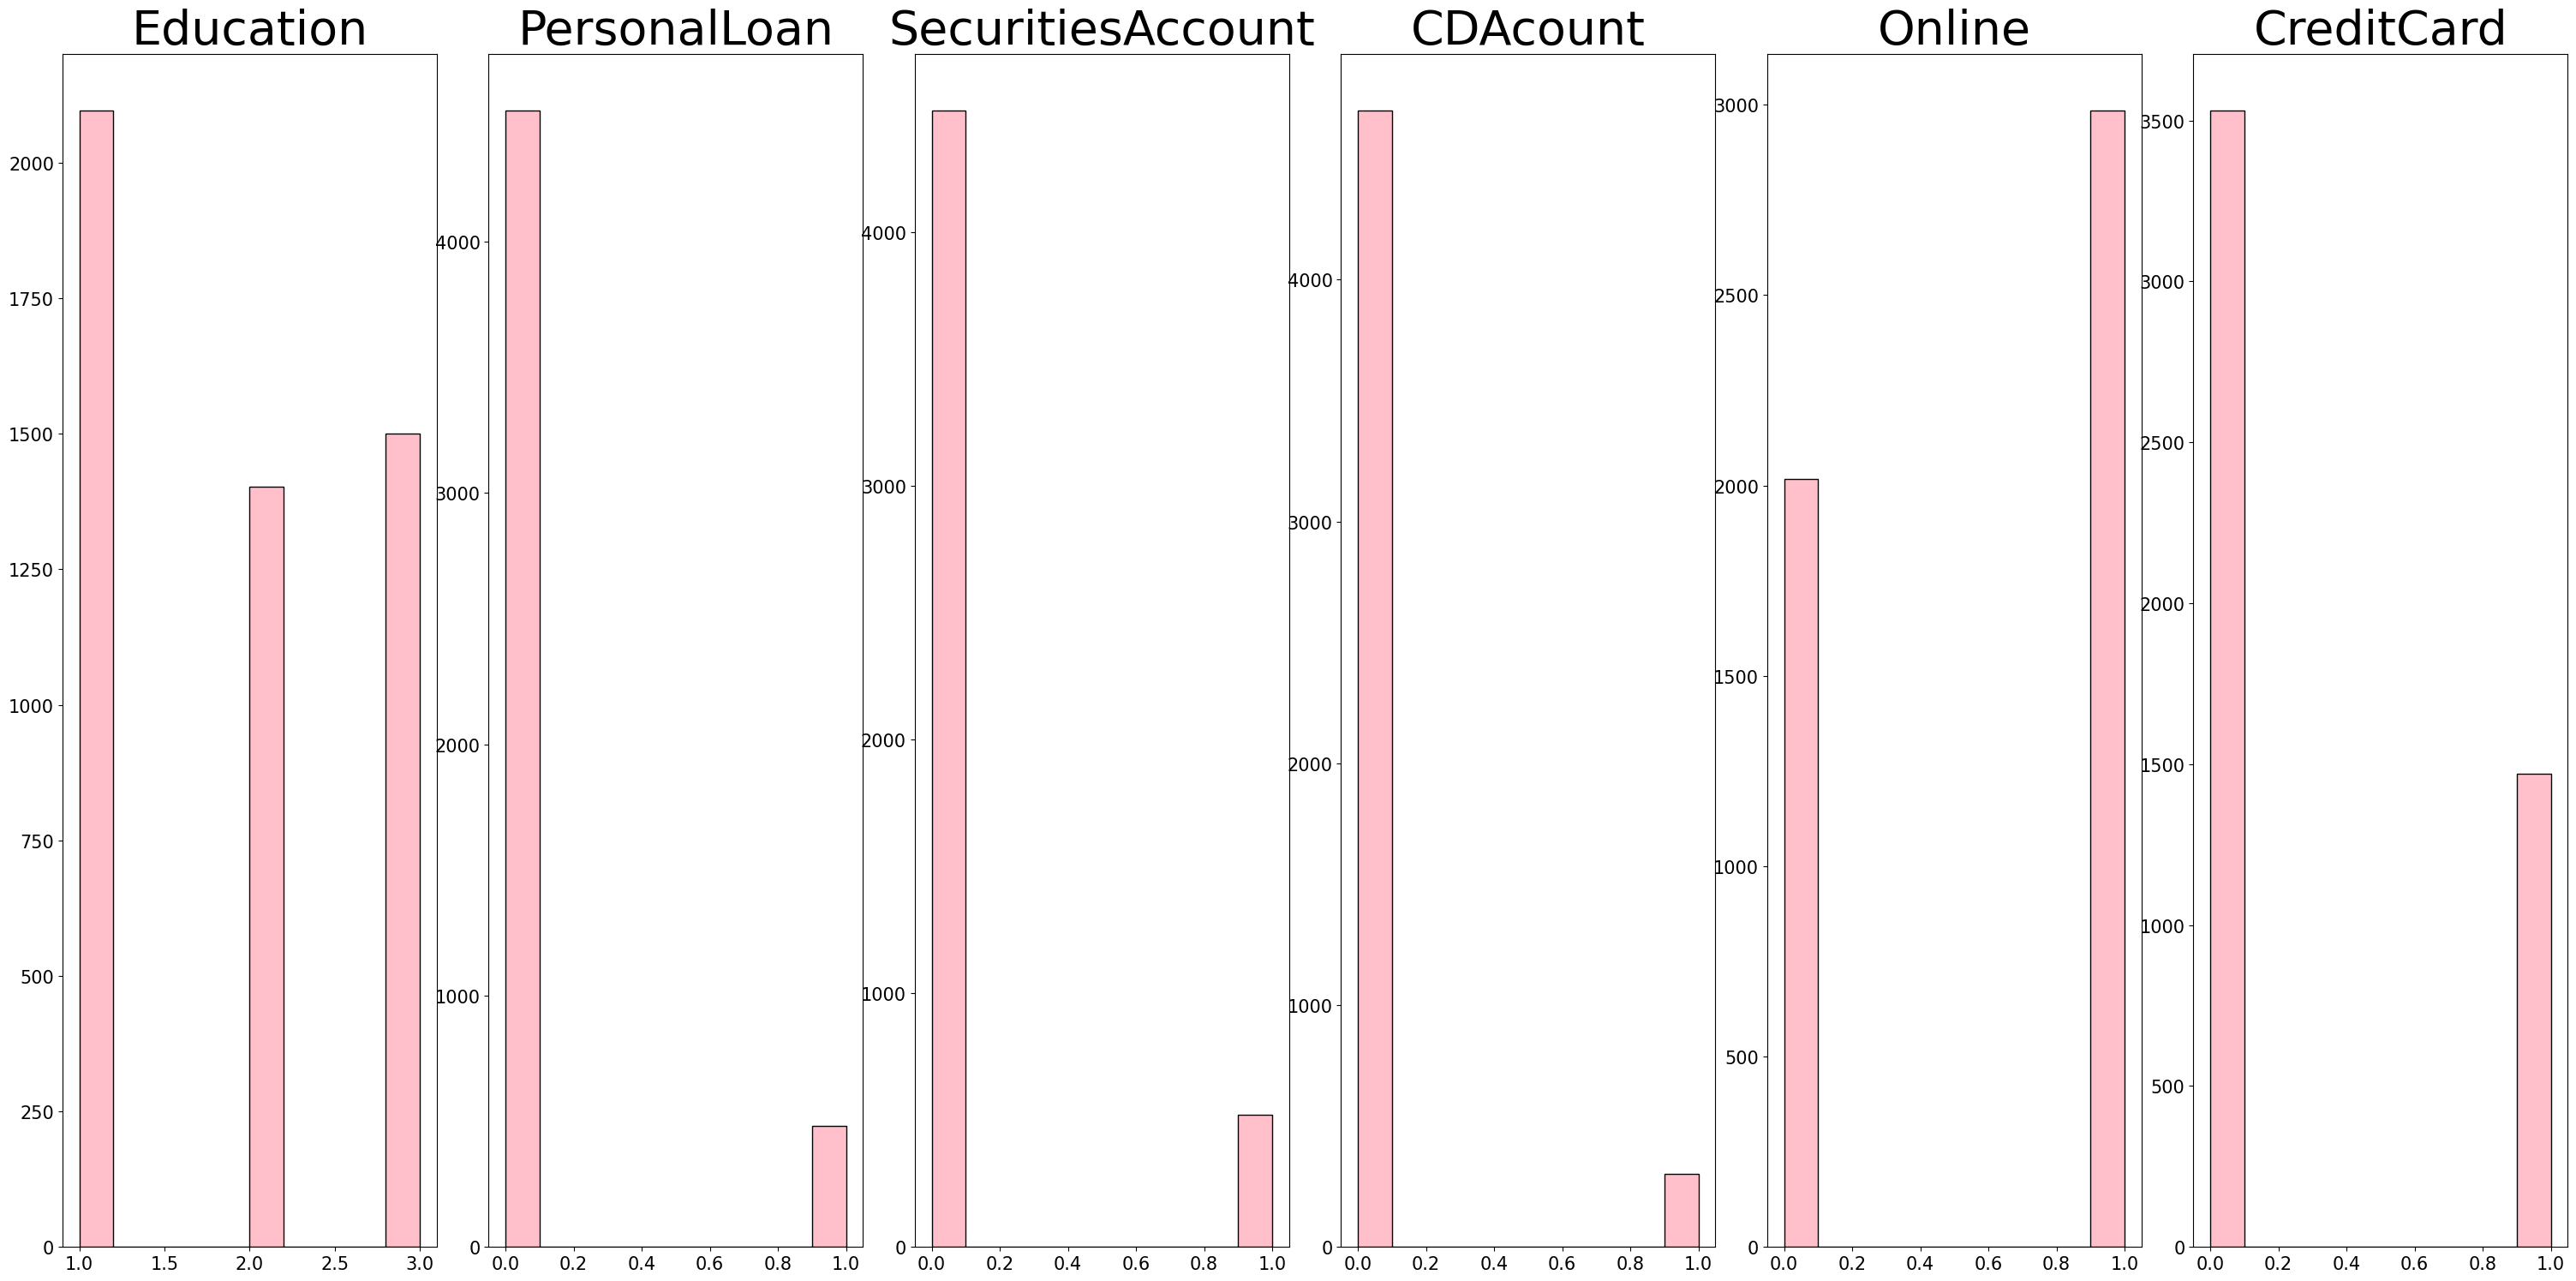

In [12]:
Education=df["Education"]
PersonalLoan=df["Personal Loan"]
SecuritiesAccount=df["Securities Account"]
CDAcount=df["CD Account"]
Online=df["Online"]
CreditCard=df["CreditCard"]

fig,ax=plt.subplots(nrows=1, ncols=6, figsize=(30, 15))
ax[0].hist(Education, color="pink", ec="black")
ax[1].hist(PersonalLoan,  color="pink", ec="black")
ax[2].hist(SecuritiesAccount,  color="pink", ec="black")
ax[3].hist(CDAcount,  color="pink", ec="black")
ax[4].hist(Online,  color="pink", ec="black")
ax[5].hist(CreditCard,  color="pink", ec="black")


ax[0].set_title("Education", fontsize=40)
ax[1].set_title("PersonalLoan", fontsize=40)
ax[2].set_title("SecuritiesAccount", fontsize=40)
ax[3].set_title("CDAcount", fontsize=40)
ax[4].set_title("Online", fontsize=40)
ax[5].set_title("CreditCard", fontsize=40)


fig.tight_layout()
for ax in ax:
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.show

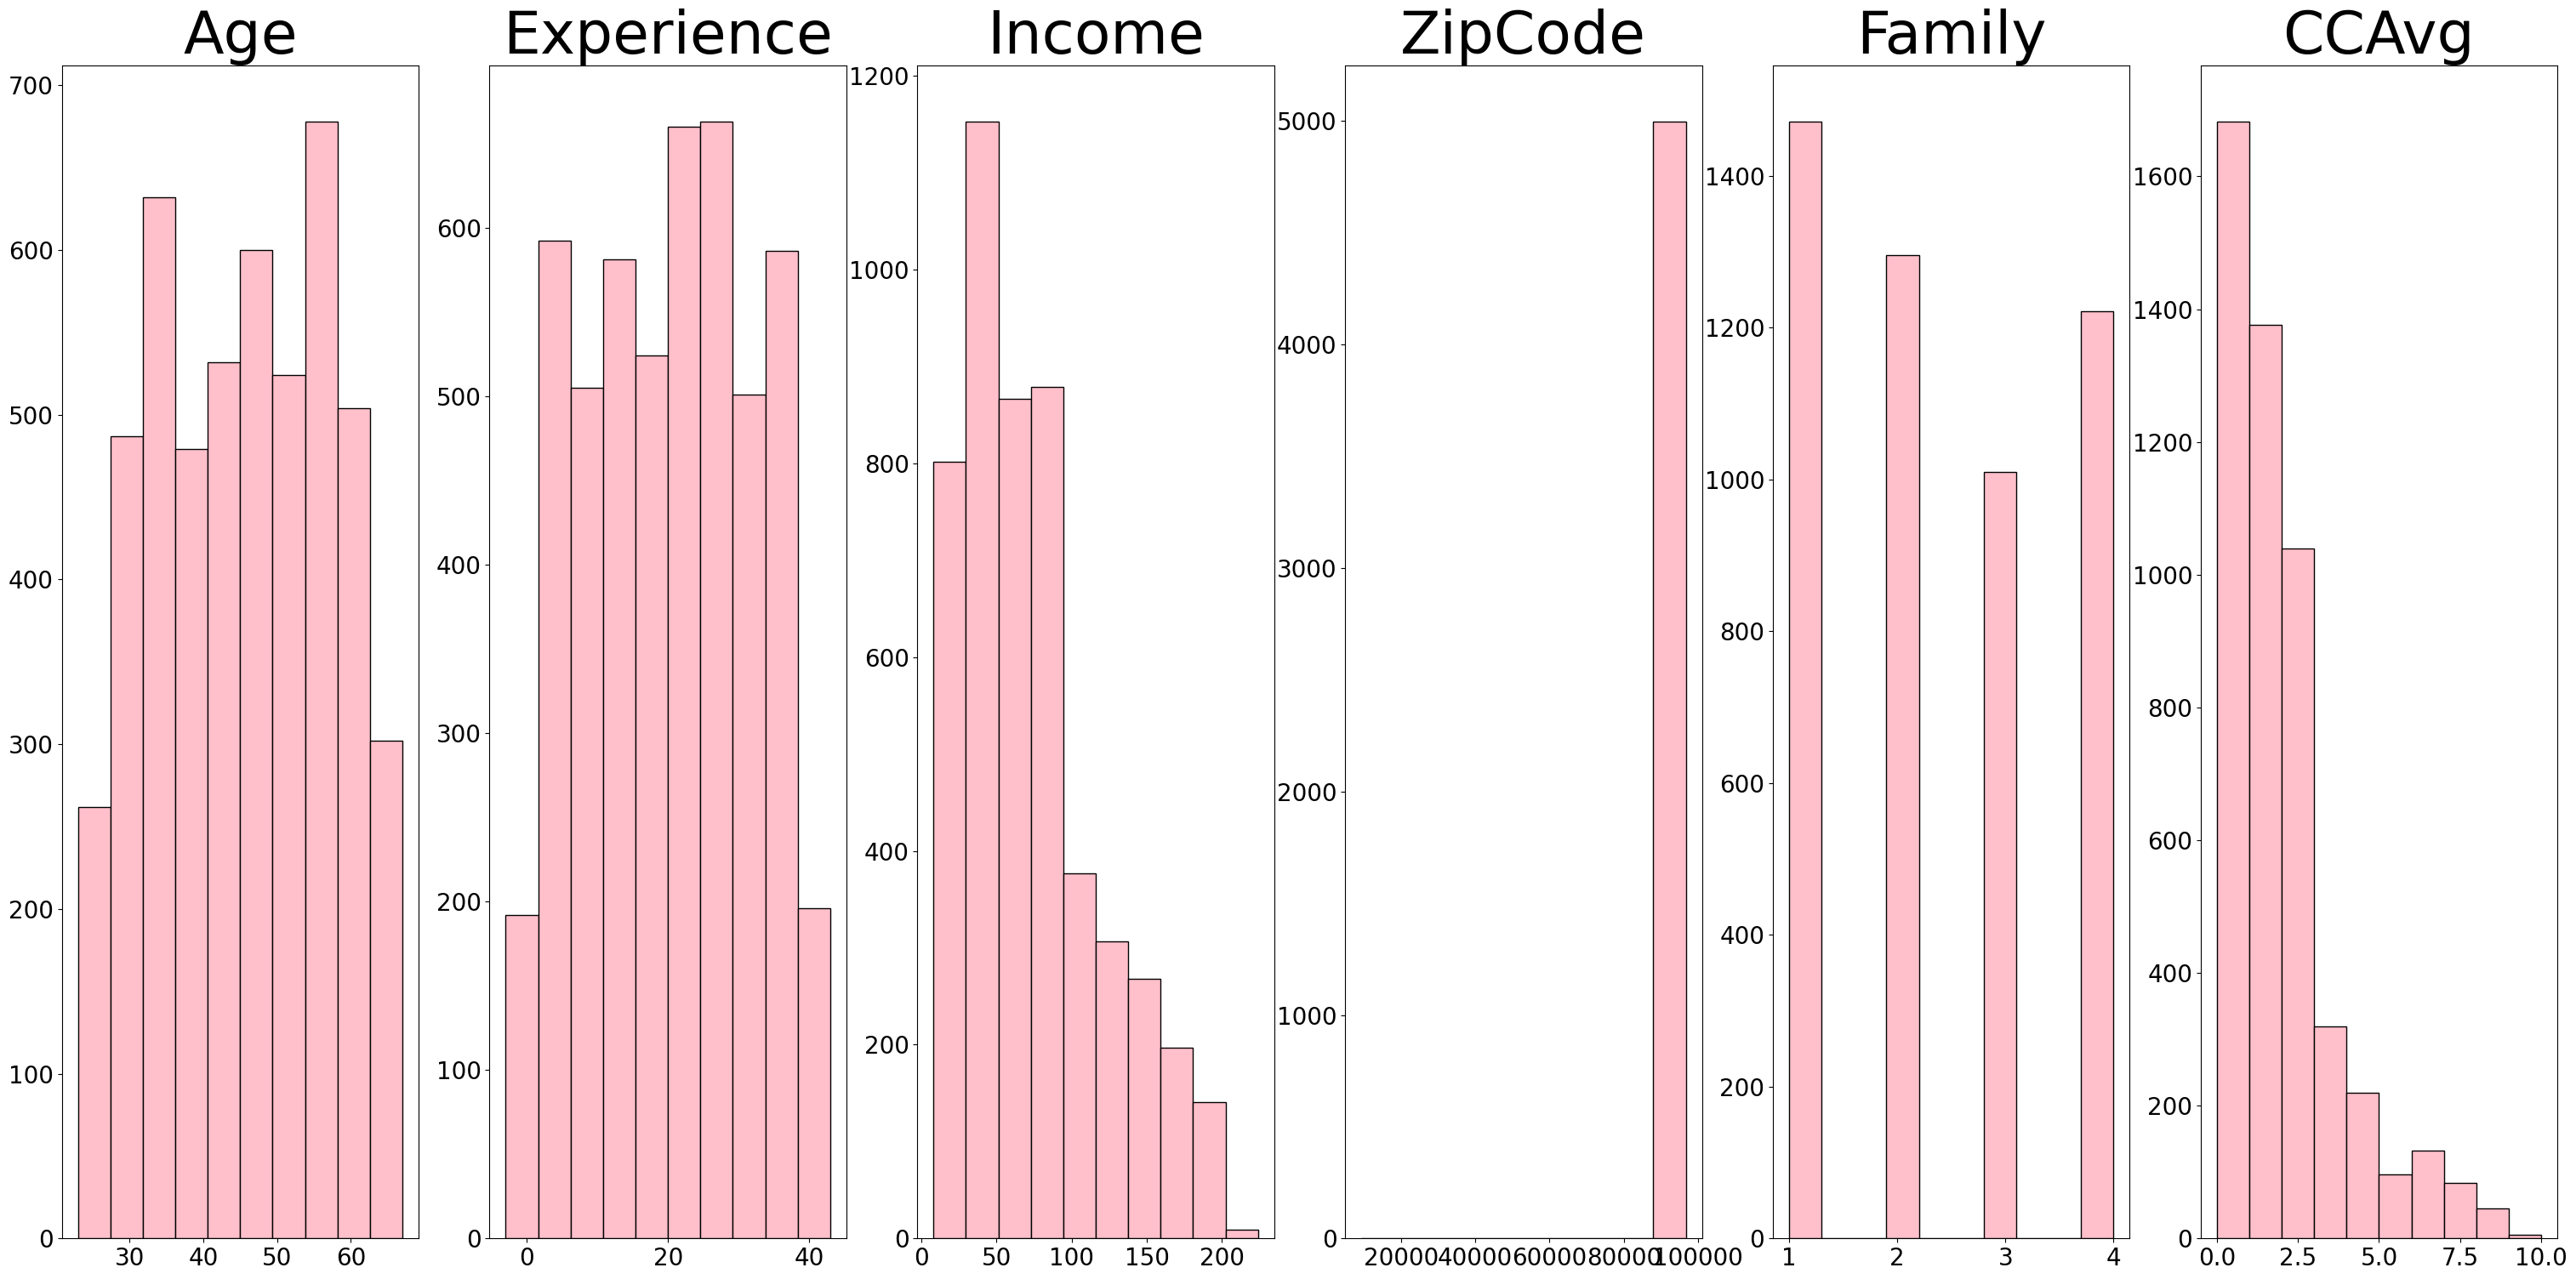

In [13]:
Age=df["Age"]
Experience=df["Experience"]
Income=df["Income"]
ZiPCode=df["ZIP Code"]
Family=df["Family"]
CCAvg=df["CCAvg"]

fig,ax=plt.subplots(nrows=1, ncols=6, figsize=(30, 15))
ax[0].hist(Age, color="pink", ec="black")
ax[1].hist(Experience,  color="pink", ec="black")
ax[2].hist(Income,  color="pink", ec="black")
ax[3].hist(ZiPCode,  color="pink", ec="black")
ax[4].hist(Family,  color="pink", ec="black")
ax[5].hist(CCAvg,  color="pink", ec="black")

ax[0].set_title("Age", fontsize=50)
ax[1].set_title("Experience", fontsize=50)
ax[2].set_title("Income", fontsize=50)
ax[3].set_title("ZipCode", fontsize=50)
ax[4].set_title("Family", fontsize=50)
ax[5].set_title("CCAvg", fontsize=50)

fig.tight_layout()
for ax in ax:
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.show

#### We see the number of observations for each value of the experience column


In [14]:
df['Experience'].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

#### We eliminate observations where the experience is negative


In [15]:
df = df[df['Experience'] >= 0]
df['Experience'].value_counts()

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
24    131
3     129
14    127
16    127
30    126
34    125
17    125
27    125
29    124
22    124
7     121
8     119
15    119
6     119
10    118
33    117
13    117
11    116
37    116
36    114
21    113
4     113
31    104
12    102
38     88
2      85
39     85
1      74
0      66
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

# Machine learning

## Model preparation

#### Create a NumPy array from the column Personal loan


In [16]:
y=np.asarray(df["Personal Loan"])
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

#### Standardize the data in variables that we are goin to need to predict personal loan


In [17]:
X = df.drop("Personal Loan", axis=1)

transform = preprocessing.StandardScaler()
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.81607218, -1.70907378, -0.53818221, -0.96149424,  1.40075673,
        -0.19223018, -1.04678163,  2.9307247 , -0.2549552 , -1.21714598,
        -0.64540482],
       [-0.04922393, -0.11767862, -0.86350581, -1.44022547,  0.52992568,
        -0.24945421, -1.04678163,  2.9307247 , -0.2549552 , -1.21714598,
        -0.64540482],
       [-0.57927841, -0.47132199, -1.36233535,  0.73757841, -1.21173641,
        -0.53557436, -1.04678163, -0.34121253, -0.2549552 , -1.21714598,
        -0.64540482],
       [-0.93264806, -1.00178704,  0.56791806,  0.45165641, -1.21173641,
         0.43723415,  0.14417618, -0.34121253, -0.2549552 , -1.21714598,
        -0.64540482],
       [-0.93264806, -1.09019789, -0.62493517, -0.85662482,  1.40075673,
        -0.53557436,  0.14417618, -0.34121253, -0.2549552 , -1.21714598,
         1.54941514]])

#### The sample is divided into 2, one part to train and another to test the model


In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)


#### We define the function to create a confusion matrix


In [19]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['does not have a loan', 'have a loan']); ax.yaxis.set_ticklabels(['does not have a loan', 'have a loan']) 
    plt.show() 

## 1.Logistic Regression

#### We train the model using the GridSearchCV function which will make us find the best hyperparameters for the model


In [20]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr=LogisticRegression()
logreg_cv=GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9522477943996931


####  We make the prediction of the model and calculate the evaluation metrics


In [21]:
# Prediction
logreg_yhat=logreg_cv.predict(X_test)
# Evaluation metrics
Logreg_accuracy=accuracy_score(y_test, logreg_yhat)
Logreg_precision=precision_score(y_test, logreg_yhat)
Logreg_recall=recall_score(y_test, logreg_yhat)
Logreg_f1_score=f1_score(y_test, logreg_yhat)

print("Accuracy :",Logreg_accuracy)
print("Precision :",Logreg_precision)
print("Recall :",Logreg_recall)
print("f1_score :",Logreg_f1_score)

Accuracy : 0.9474747474747475
Precision : 0.8055555555555556
Recall : 0.6041666666666666
f1_score : 0.6904761904761905


#### Confusion matrix


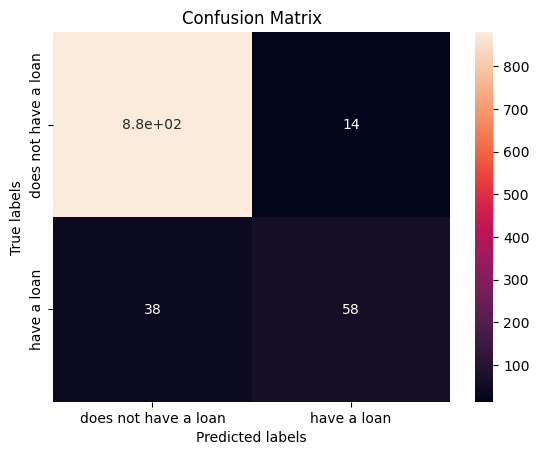

In [22]:
plot_confusion_matrix(y_test,logreg_yhat)

## 2. Suport vector machine

####  We train the model using the GridSearchCV function which will make us find the best hyperparameters for the model


In [31]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()



In [32]:
svm_cv=GridSearchCV(svm, parameters, cv=10,)
svm_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [33]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 31.622776601683793, 'gamma': 0.03162277660168379, 'kernel': 'rbf'}
accuracy : 0.9818079529471934


In [34]:
# Prediction
svm_yhat=svm_cv.predict(X_test)
# Evaluation metrics
svm_accuracy=accuracy_score(y_test, svm_yhat)
svm_precision=precision_score(y_test, svm_yhat)
svm_recall=recall_score(y_test, svm_yhat)
svm_f1_score=f1_score(y_test, svm_yhat)

print("Accuracy :",svm_accuracy)
print("Precision :",svm_precision)
print("Recall :",svm_recall)
print("f1_score :",svm_f1_score)

Accuracy : 0.9848484848484849
Precision : 0.9655172413793104
Recall : 0.875
f1_score : 0.9180327868852458


#### Confusion matrix


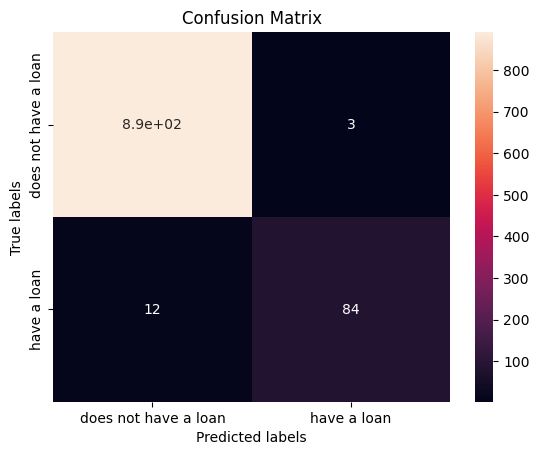

In [35]:
plot_confusion_matrix(y_test,svm_yhat)

## 3. Decision Tree

####  We train the model 


In [36]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

####  We make the prediction of the model and calculate the evaluation metrics


In [38]:
# Prediction
tree_yhat=tree.predict(X_test)
# Evaluation metrics
tree_accuracy=accuracy_score(y_test, tree_yhat)
tree_precision=precision_score(y_test, tree_yhat)
tree_recall=recall_score(y_test, tree_yhat)
tree_f1_score=f1_score(y_test, tree_yhat)

print("Accuracy :",tree_accuracy)
print("Precision :",tree_precision)
print("Recall :",tree_recall)
print("f1_score :",tree_f1_score)

Accuracy : 0.9868686868686869
Precision : 0.9560439560439561
Recall : 0.90625
f1_score : 0.9304812834224598


#### Confusion matrix

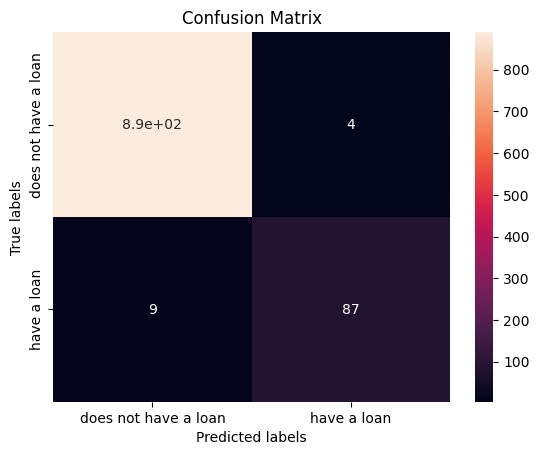

In [40]:
plot_confusion_matrix(y_test,tree_yhat)

## 4. K nearest neighbor

####  We train the model using the GridSearchCV function which will make us find the best hyperparameters for the model


In [27]:

parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

knn_cv=GridSearchCV(KNN, parameters, cv=10,)
knn_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}
accuracy : 0.9646221710778672


####  We make the prediction of the model and calculate the evaluation metrics


In [29]:
# Prediction
Knn_yhat=knn_cv.predict(X_test)
# Evaluation metrics
Knn_accuracy=accuracy_score(y_test, Knn_yhat)
Knn_precision=precision_score(y_test, Knn_yhat)
Knn_recall=recall_score(y_test, Knn_yhat)
Knn_f1_score=f1_score(y_test, Knn_yhat)

print("Accuracy :",Knn_accuracy)
print("Precision :",Knn_precision)
print("Recall :",Knn_recall)
print("f1_score :",Knn_f1_score)

Accuracy : 0.9656565656565657
Precision : 0.8974358974358975
Recall : 0.7291666666666666
f1_score : 0.8045977011494253


#### Confusion matrix


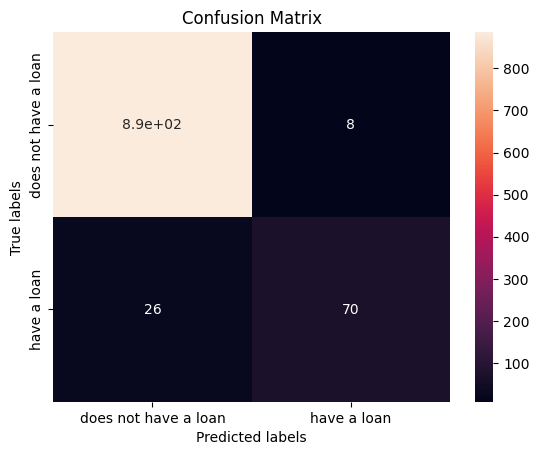

In [30]:
plot_confusion_matrix(y_test,Knn_yhat)

## Comparison of each model according to its metrics

In [43]:
Precision= [
    Logreg_precision,
    svm_precision,
    tree_precision,
    Knn_precision,
]
    
    
    
Recall= [
    Logreg_recall,
    svm_recall,
    tree_recall,
    Knn_recall,
]
    
    
f1_scores = [
             Logreg_f1_score,
             svm_f1_score,
             tree_f1_score,
             Knn_f1_score,
            ]

accuracy = [Logreg_accuracy, svm_accuracy, tree_accuracy, Knn_accuracy]

scores = pd.DataFrame(np.array([accuracy,Precision, Recall, f1_scores ]), index=['accuracy', 'Precision', 'Recall', "f1_scores"] , columns=['LogReg', 'SVM', 'Tree', 'KNN'])
scores

,LogReg,SVM,Tree,KNN
accuracy,0.947475,0.984848,0.986869,0.965657
Precision,0.805556,0.965517,0.956044,0.897436
Recall,0.604167,0.875000,0.906250,0.729167
f1_scores,0.690476,0.918033,0.930481,0.804598
